# Instructions

The places where you have enter code, to answer the questions, are marked with `# YOUR CODE HERE`.

## Question 1 (6 points)

Given the following QUBO, complete the function `create_bqm` so that it returns the corresponding BQM.

$$- 7x_1 - 2x_2 - 10x_3 - 4x_4 + 5x_1x_2 + 3x_1x_3 + 6x_2x_3 - 8x_3x_4 - 2$$


The function `create_bqm` has

- Input: None
- Returns:
    - A BQM instance


In [12]:
from dimod import BQM

def create_bqm():
    # YOUR CODE HERE
    linear = {"x1": -7, "x2": -2, "x3": -10, "x4": -4}
    quadratic = {("x1", "x2"): 5, ("x1", "x3"): 3, ("x2", "x3"): 6, ("x3", "x4"): -8}
    offset = -2
    vartype = "BINARY"
    bqm = BQM(linear, quadratic, offset, vartype)
    # Do not modify anything below this line
    return bqm

In [13]:
# You can use this cell to call and check the output of the function

print(create_bqm())

BinaryQuadraticModel({'x1': -7.0, 'x2': -2.0, 'x3': -10.0, 'x4': -4.0}, {('x2', 'x1'): 5.0, ('x3', 'x1'): 3.0, ('x3', 'x2'): 6.0, ('x4', 'x3'): -8.0}, -2.0, 'BINARY')


In [ ]:
# hidden tests will be used for grading.

## Question 2 (6 points)

Function `solve_Q` takes as input a matrix representation of a QUBO formulation. Complete the function `solve_Q` so that it returns the solution to the given problem. Use D-Wave's `ExactSolver()`.


The function `solve_Q` has

- Input:
    - Q matrix representation of QUBO as an `numpy.array`.
- Returns:
    - Sample with the lowest energy (first sample of the SampleSet)


In [16]:
from dimod import BQM


def solve_Q(Q):
    # YOUR CODE HERE
    bqm_np = BQM(Q, "BINARY")
    #print(bqm_np)
    # Do not modify anything below this line
    sampler = ExactSolver()
    sampleset = sampler.sample(bqm_np)    
    return sampleset.first

In [17]:
# You can use this cell to call and check the output of the function
import numpy as np
from dimod.reference.samplers import ExactSolver


Q = np.array([[1, 1], [0, 1]])
print(solve_Q(Q))

Sample(sample={0: 0, 1: 0}, energy=0.0, num_occurrences=1)


In [3]:
# hidden tests will be used for grading.

## Question 3 (6 points)

You are given a graph $G$ in the next cell where the nodes are labeled $0,1,\dots,8$. Create a BQM with `SPIN` variables to solve Max-Cut problem for the given graph. Variables should be named with the name of the correspoding node.

The function `max_cut` has

- Input: None 
- Returns:
    - BQM with SPIN variables for graph `G`


EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

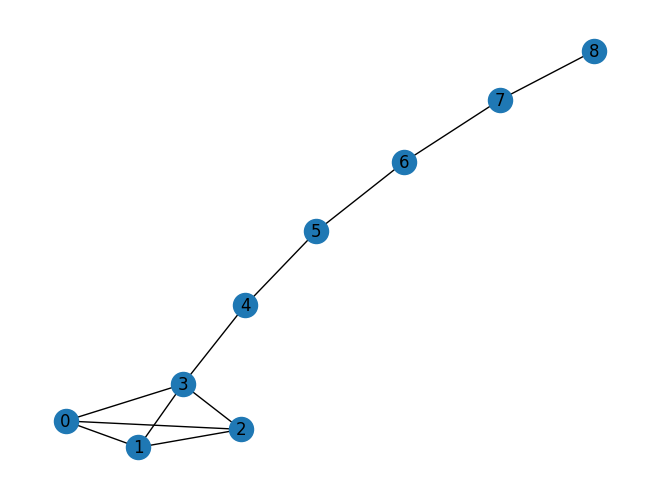

In [22]:
import networkx as nx

G = nx.lollipop_graph(4, 5)
nx.draw(G, with_labels=True)
G.edges

In [28]:
from dimod import BQM


def max_cut():
    h = {}
    J = {}
    
    for i, j in G.edges:
        J[(i, j)] = 1
    
    #print("h:", h)
    #print("J:", J)
    bqm = BQM.from_ising(h, J)
    
    # YOUR CODE HERE
    # Do not modify anything below this line
    return bqm

In [29]:
# You can use this cell to call and check the output of the function
print(max_cut())

BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, {(1, 0): 1.0, (2, 0): 1.0, (2, 1): 1.0, (3, 0): 1.0, (3, 1): 1.0, (3, 2): 1.0, (4, 3): 1.0, (5, 4): 1.0, (6, 5): 1.0, (7, 6): 1.0, (8, 7): 1.0}, 0.0, 'SPIN')


In [ ]:
# hidden tests will be used for grading.
# If this cell results in an error, your implementation is incorrect